Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Data Preperation

In [6]:
file_path = "C:/Users/Nathanael P.A/Desktop/heart.csv"
data = pd.read_csv(file_path)
data.info()
print("Missing Values:\n", data.isnull().sum())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Missing Values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype:

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploratory Data Analysis (EDA)

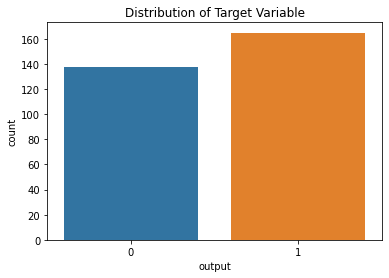

In [8]:
sns.countplot(x='output', data=data)
plt.title('Distribution of Target Variable')
plt.show()

Compare two different variables with analysis

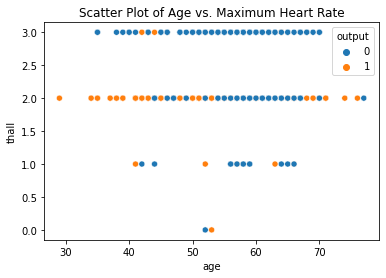

In [11]:
sns.scatterplot(x='age', y='thall', hue='output', data=data)
plt.title('Scatter Plot of Age vs. Maximum Heart Rate')
plt.show()

Brief Analysis: Younger individuals with higher maximum heart rates tend to have a higher chance of heart attack.

Model Building and Analysis

In [12]:
X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
models = [
    ('K-Nearest Neighbor', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}')
    print('-' * 50)


K-Nearest Neighbor Accuracy: 0.9016
Classification Report for K-Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix for K-Nearest Neighbor:
[[27  2]
 [ 4 28]]
--------------------------------------------------
Logistic Regression Accuracy: 0.8525
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix for Logistic Regression:
[[25  4]
 [ 5 27]]
--------

Conclusion: K-Nearest Neighbor and Random Forest achieved the highest accuracy which provides more meaningful classification reports while Logistic Regression achieved the lowest accuracy which is not ideal as the classification report is not as meaningful. Further fine-tuning and optimization can be done to improve the model performance.